# Compensador integral

Já aprendemos a projetar um regulador de estados com controle integral. Com isso, podemos realizar um compensador com integrador, o que nos fornece uma solução de controle em malha fechada relativamente completa. 

Pelo princípio da separação, o algoritmo de projeto fica bastante simples: projete o regulador integral e o observador de forma separada, seguindo os passos já descritos.

O único detalhe que precisamos atentar é que o regulador é projetado com as matrizes aumentadas, mas o observador não necessariamente. Basta utilizar a informação original do sistema (isto é, $\mathbf{A}$ e $\mathbf{C}$).

Note que isso é uma opção. Em tese, você pode usar as matrizes aumentadas para projeto do observador, mas isso não seria produtivo, uma vez que o estado aumentado é apenas um artificio para zerar o erro de regime; fazer o observador estimar este estado é desnecessário e apenas aumentaria a ordem do sistema sem nenhum propósito real. 

Para finalizar o compensador, devemos calcular o observador de estados. O projeto é feito normalmente, sem aumentar as matrizes. Isso porque o novo estado é calculado diretamente da saída e não precisa ser estimado.

## Equações de estado do compensador:

Suponhamos que o observador seja:
$$
    \dot{\mathbf{\hat{x}}} = \mathbf{A}\hat{\mathbf{x}}+\mathbf{B}u + \mathbf{L}(y-\mathbf{C}\mathbf{\hat{x}})
$$

Com a adição de um integrador temos:
$$
\dot{e} = y -r
$$

Para o compensador, a ação de controle será $u = -\mathbf{K}_a\left[\begin{array}{cc}\mathbf{\hat{x}} & e\end{array}\right]$, onde $\mathbf{K}_a$ é projetado com as matrizes aumentadas. Lembre-se que temos que usar $\mathbf{\hat{x}}$ na ação de controle, ao invés de $\mathbf{x}$. 


Para escrever o compensador no espaço de estados, vamos usar uma notação compacta. Vamos fazer $\mathbf{z}=\left[\begin{array}{cc}\mathbf{\hat{x}} & e\end{array}\right]$.

Juntando todas as equações, temos que a equação de estados matricial do compensador integral será:
$$
\begin{align*}
    \dot{\mathbf{z}}&=
    (\mathbf{A'}-\mathbf{B'}\mathbf{K}_a-\mathbf{L}_a\mathbf{C'})
    \mathbf{z}+
    \left[\begin{array}{cc}\mathbf{0} & \mathbf{L}\\ 1 & -1\end{array}\right]
    \left[\begin{array}{c} r\\ y\end{array}\right]
\end{align*}
$$
onde:
$$
\begin{align}
    \mathbf{A'} &= \left[\begin{array}{rr}
        \mathbf{A} & \mathbf{0}\\ \mathbf{0} & 0
    \end{array}\right]\\
    \mathbf{B'} &= \left[\begin{array}{rr}
        \mathbf{B} \\ 0
    \end{array}\right]\\
    \mathbf{C'} &= \left[\begin{array}{rr}
        \mathbf{C} & 0
    \end{array}\right]\\
    \mathbf{L}_a &= \left[\begin{array}{rr}
        \mathbf{L} \\ 0
    \end{array}\right]
\end{align}
$$

A saída do compensador é o sinal de controle $u = -\mathbf{K}_a\mathbf{z}$. 

Note que o compensador usa **duas entradas**: a referência e a saída da planta. Podemos enxergá-lo através de duas funções de transferência: uma de $Y$ para $U$ e outra de $R$ para $U$. Assim, a saída do controlador poderia ser descrita como:
$$
\begin{align}
    U(s) = C_1(s)Y(s)+C_2(s)R(s)
\end{align}
$$

As funções de transferência $C_1(s)$ e $C_2(s)$ podem ser calculadas pelas matrizes usando a expressão que já estudamos. 

Do ponto de vista de fluxo de sinal, o sistema em malha fechada funciona conforme o diagrama de blocos a seguir

<p align="center">
<img src="controleIntegral.svg" width="60%">
</p>

Esse diagrama pode ser modificado para utilizar a estrutura convencional de controle com realimentação unitária, mas nesse caso, o bloco que alimenta a referência sofre modificação (*desafio: verifique que diagrama é esse*)

## Equações em malha fechada

Para simplificar, vamos supor que $J=0$ e que em malha aberta o sistema é de ordem $n$. 

Em malha fechada o sistema ficará de ordem $2n+1$. 

As seguintes dimensões se aplicam:
- $\mathbf{K_a}\longrightarrow (1 \times n+1)$ 
- $\mathbf{L}\longrightarrow (n \times 1)$ 
- $\mathbf{A'} \longrightarrow (n+1 \times n+1)$ 
- $\mathbf{B'} \longrightarrow (n+1 \times 1)$ 
- $\mathbf{C'} \longrightarrow (1 \times n+1)$ 


A entrada passa a ser apenas a referência, e devemos substituir $y=\mathbf{Cx}$. Assim temos:
$$
\begin{align*}
    \dot{\mathbf{x}} &= \mathbf{Ax}-\mathbf{B}\mathbf{K}_a{\mathbf{z}}\\
    \dot{{\mathbf{z}}} &= (\mathbf{A'}-\mathbf{B'}\mathbf{K}_a-\mathbf{L}_a\mathbf{C'})\mathbf{z}+
    \left[\begin{array}{cc}\mathbf{0} \\ 1\end{array}\right]r+
    \left[\begin{array}{cc}\mathbf{L}\\  -1\end{array}\right]\mathbf{Cx}\\
    y &= \mathbf{Cx}
\end{align*}
$$

Em termos de matrizes fica:
$$
\begin{align*}
    \mathbf{A}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{A} & & -\mathbf{B}\mathbf{K_a}\\ \\
    \mathbf{F} & &
    \mathbf{A'}-\mathbf{B'}\mathbf{K}_a-\mathbf{L}_a\mathbf{C'}
    \end{array}\right]\\
    \mathbf{B}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{0}_{2n,\, 1}\\ 1
    \end{array}\right]\\
    \mathbf{C}_{\text{mf}} &= \left[\begin{array}{ccc}
    \mathbf{C} & \mathbf{0}_{1,n+1}
    \end{array}\right]
\end{align*}
$$

onde, para simplificar, definimos:
$$
\mathbf{F} = \left[\begin{array}{cc}\mathbf{L}\\  -1\end{array}\right]\mathbf{C}
$$
que é dimensão ${n+1\times n}$

Se desejar, adicione uma coluna à matriz $\mathbf{B}_{mf}$ para simular perturbações. 

## Exemplo:

Construa um compensador com controle integral para o sistema
$$
\begin{align}
    G(s) = \frac{10}{(s+1)(s+2)}
\end{align}
$$
para que $\xi = 0.7$ e $\omega_n=2$.


In [2]:
# Imports
import numpy as np
import control as ct
from IPython.display import display, Math
from escrever import *
esc = escrever()

In [3]:
# Polos desejados
xi = 0.7
wn = 2
sigma = xi*wn
p = -sigma + 1j*wn*np.sqrt(1-xi**2)
p_reg = np.array([p,np.conj(p),-4*sigma])
print('Pólos do regulador: ', p_reg.round(4))

Pólos do regulador:  [-1.4+1.4283j -1.4-1.4283j -5.6+0.j    ]


In [4]:
# Matrizes do sistema em FCC
A = np.array([[-3,-2],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,10]])
D = np.zeros((1,1))

sys = ct.ss(A,B,C,D)
esc.sist(A,B,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Função de transf. de malha aberta
ct.tf(sys)

TransferFunction(array([10.]), array([1., 3., 2.]))

In [6]:
# Matrizes do sistema aumentado
Aa = np.block([[A,np.zeros((2,1))],[-C,0]])           # [F  | 0]
Ba = np.block([[B],[0]])
display(Math(r'\mathbf{A}_a = ' + esc.mat(Aa)))
display(Math(r'\mathbf{B}_a = ' + esc.mat(Ba)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Regulador com integrador
Ka = ct.acker(Aa,Ba,p_reg)
display(Math(r'\mathbf{K}_a = ' + esc.mat(Ka.round(4))))

<IPython.core.display.Math object>

In [8]:
# Observador
p_obs = [-8*sigma]*2                    # [-8*sigma]*2 => [-8*sigma, -8*sigma]
L = ct.acker(A.T,C.T, p_obs).T        
display(Math(r'\mathbf{L} = ' + esc.mat(L)))

<IPython.core.display.Math object>

In [12]:
# Sistema em malha fechada
n = A.shape[0]
F = np.block([[L],[-1]]) @ C
Ap = np.block([[A, np.zeros((n,1))],[np.zeros((1,n)), 0]])
Bp = np.block([[B],[0]])
Cp = np.block([C,0])
La = np.block([[L],[0]])

Amf = np.block([[A, -B@Ka],
                [F, Ap-Bp@Ka-La@Cp]])
Bmf = np.block([[np.zeros((2*n,1))],[1]])
Cmf = np.block([[C,np.zeros((1,n+1))]])
Dmf = np.array([[0]])
                
# Espaço de estados para o sistema em MF, saída y, entrada r
MF = ct.ss(Amf,Bmf,Cmf,Dmf)
esc.sist(Amf.round(4),Bmf.round(4),Cmf.round(4),Dmf)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
# Função de transf. em malha fechada
ct.tf(MF)

TransferFunction(array([-2.84217094e-14, -7.38964445e-13,  2.24000000e+01,  5.01760000e+02,
        2.80985600e+03]), array([1.0000000e+00, 3.0800000e+01, 3.3328000e+02, 1.5169280e+03,
       2.9704192e+03, 2.8098560e+03]))

In [14]:
# Vamos analisar polos e zeros de malha fechada
tabela=ct.damp(MF)

print('Zeros: ')
print(round(ct.zeros(MF),4))
print('')
# Vale a pena comparar com os zeros do sistema e polos desejados originais, regulador e observador
print('Pólos desejados (regulador): ')
print(p_reg.round(4))
print('')
print('Pólos desejados (observador): ')
print(round(p_obs,4))


_____Eigenvalue______ Damping___ Frequency_
     -11.2                     1       11.2
     -11.2                     1       11.2
      -1.4    +1.428j        0.7          2
      -1.4    -1.428j        0.7          2
      -5.6                     1        5.6
Zeros: 
[-11.2+0.j -11.2+0.j]

Pólos desejados (regulador): 
[-1.4+1.4283j -1.4-1.4283j -5.6+0.j    ]

Pólos desejados (observador): 
[-11.2 -11.2]


In [37]:
# Simulação em malha fechada (y)
resp = ct.step_response(MF,6)
u = -Ka@resp.states[n:,:]

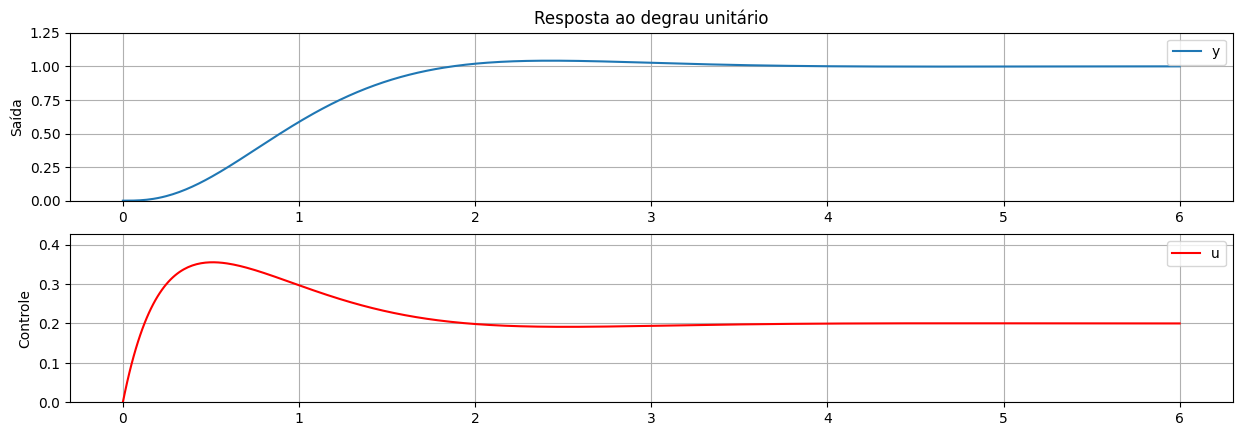

In [36]:
# Resultado
from matplotlib import pyplot as plt

plt.figure().set_figwidth(15)
plt.subplot(211)
plt.plot(resp.t,resp.outputs)
plt.ylim([0,np.max(resp.outputs)*1.2])
plt.ylabel('Saída')
plt.legend('y')
plt.title('Resposta ao degrau unitário')
plt.grid()
plt.subplot(212)
plt.plot(resp.t,u.T, 'r')
plt.ylim([0,np.max(u)*1.2])
plt.ylabel('Controle')
plt.legend('u')
plt.grid()
plt.show()